In [21]:
import pandas as pd

data = pd.read_csv('../../dataset/dataset_final.csv')
data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,Target
0,-4.362150,-1.007771,-2.563540,1.331845,-1.075936,-1.368674,-0.191537,-0.373345,-0.803115,0.837092,1.623067,-0.261753,0.235638,-0.326818,Dropout
1,-0.241665,-0.291954,-1.576865,-1.195618,1.024771,0.349829,-0.015485,-0.468722,-0.327269,0.175780,-2.409748,-0.823892,-0.581045,-0.973223,Graduate
2,-2.704703,0.883059,0.227150,-0.584111,-0.216966,-0.617850,0.370419,0.055970,-1.348930,-0.152507,-2.033690,0.099927,-1.232974,-0.678305,Dropout
3,0.366266,-0.237005,0.779684,-0.273035,-0.053979,-0.070852,-0.957714,-1.342641,-0.319636,-0.506683,-0.036937,1.136352,0.300461,-0.328121,Graduate
4,0.002403,2.173728,-0.855346,1.884833,1.329653,0.679385,-0.600227,-0.520670,0.723744,0.238530,0.123345,0.951798,-0.536999,0.329798,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6622,0.060873,-1.038330,-0.659588,-0.622870,0.090081,0.225687,0.144346,-0.735628,1.092355,-0.388809,-0.191486,-0.284427,-0.311598,-0.111791,Enrolled
6623,1.148948,-1.170207,-0.717351,-0.962082,0.870401,0.614360,0.009241,-0.920165,0.642480,0.390729,-0.037445,-0.035594,-0.211604,-0.474668,Enrolled
6624,-1.002743,0.146619,1.154968,-0.141683,-1.294870,-0.938337,0.429822,-0.098083,0.023849,-0.824973,0.271648,0.682401,0.797084,0.081801,Enrolled
6625,-0.388730,1.818346,0.501319,1.047079,0.424902,0.603358,-0.964207,-1.525201,0.314041,-0.649624,0.409576,0.568857,-0.749601,-0.016070,Enrolled


In [22]:
# reshaping
y = data['Target']
x = data.drop(['Target'], axis=1)

## Multi-class Logistic Regression


Splitting dataset into 80/20


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Multinomial Logistic Regression

In [24]:
# Initialize the Logistic Regression model with multi-class handling
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

     Dropout       0.75      0.72      0.73       444
    Enrolled       0.60      0.54      0.57       439
    Graduate       0.68      0.77      0.72       443

    accuracy                           0.68      1326
   macro avg       0.67      0.68      0.67      1326
weighted avg       0.67      0.68      0.67      1326



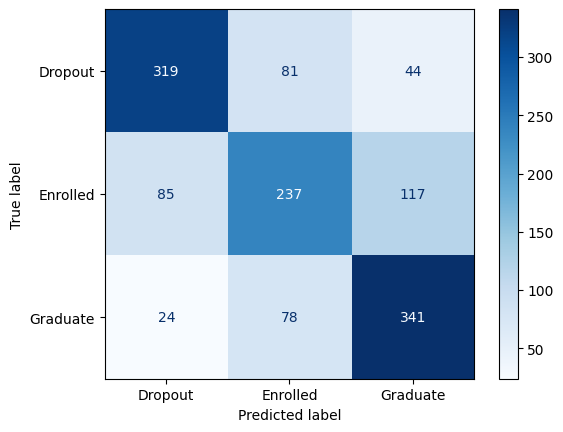

In [25]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')

OvR Logistic Regression

In [26]:
from sklearn.multiclass import OneVsRestClassifier

# Initialize the Logistic Regression model with multi-class handling
ovr = OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=42))

# Train the model
ovr.fit(X_train, y_train)

# Make predictions
y_pred = ovr.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

     Dropout       0.75      0.71      0.73       444
    Enrolled       0.60      0.53      0.56       439
    Graduate       0.67      0.79      0.72       443

    accuracy                           0.67      1326
   macro avg       0.67      0.67      0.67      1326
weighted avg       0.67      0.67      0.67      1326



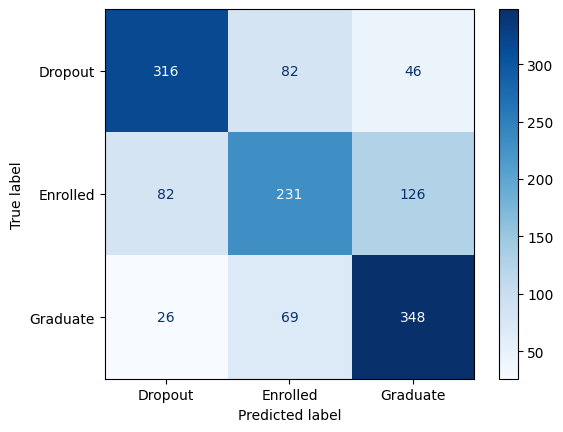

In [27]:
cm = confusion_matrix(y_test, y_pred, labels=ovr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ovr.classes_)
disp.plot(cmap='Blues')